### Introduction

It is challenging to predict the protein structure in bioinformatics. Correctly predicting only the spinal column of a tertiary structure presents a great difficulty to determinate the flexible torsion angles, as well as angles of the individual side chains. The data can be downloaded from [here.](https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure)

Attributes Information:

**RMSD**-Size of the residue.\
**F1** - Total surface area.\
**F2** - Non polar exposed area.\
**F3** - Fractional area of exposed non polar residue.\
**F4** - Fractional area of exposed non polar part of residue.\
**F5** - Molecular mass weighted exposed area.\
**F6** - Average deviation from standard exposed area of residue.\
**F7** - Euclidian distance.\
**F8** - Secondary structure penalty.\
**F9** - Spacial Distribution constraints (N,K Value).\

Objective: — To find out which model is fast and high accuracy in predicting root mean square deviation.

#### Import Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from configparser import Interpolation
from numpy import ndenumerate
plt.style.use('default')
%matplotlib inline

#### Load the dataset

In [3]:
data = pd.read_csv('CASP.csv')
data.head()


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


#### Statistical Insights

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


This list is 10 columns and all labels are numerical(labelled as 'int' and 'float')

In [7]:
data.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


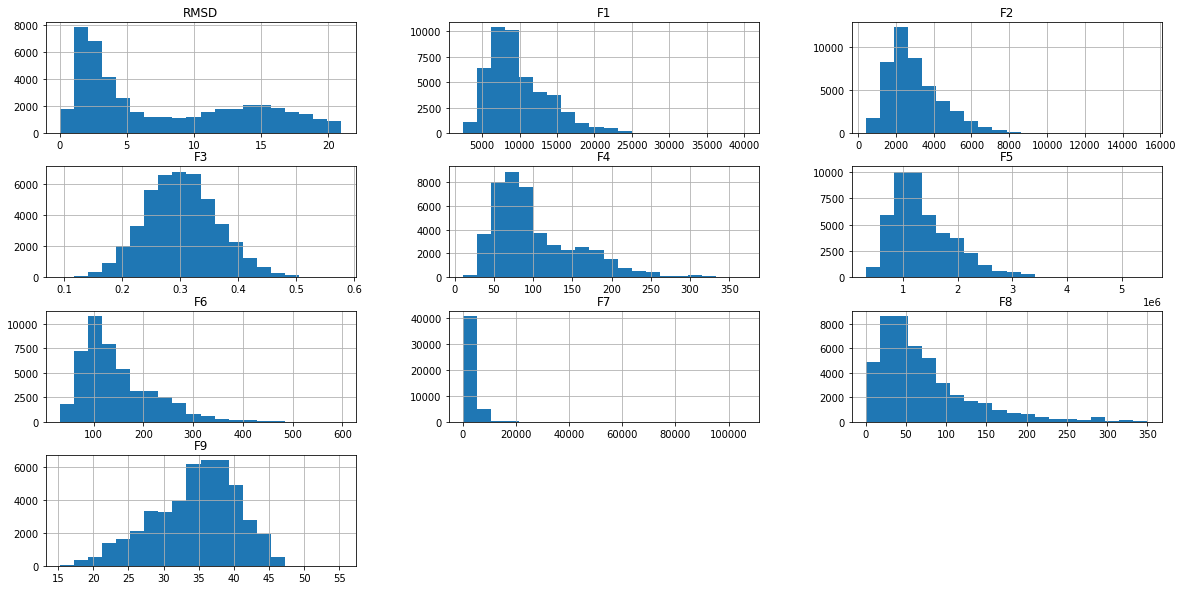

In [9]:
data.hist(bins=20, figsize=(20,10))
plt.show()

In [10]:
np.any(data.values == np.nan)

False

C:\Users\user\AppData\Local\Temp\ipykernel_3660\799249608.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(data));
C:\Users\user\AppData\Local\Temp\ipykernel_3660\799249608.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+list(data));


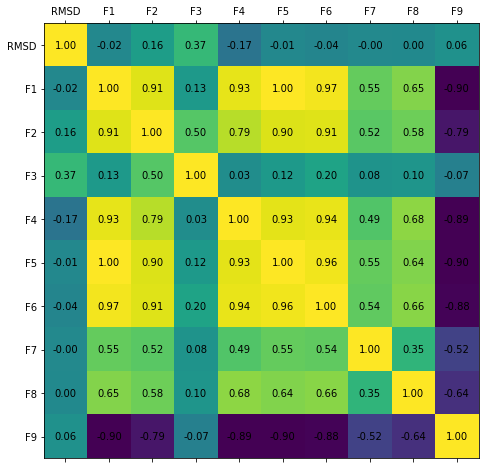

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), interpolation='none')

for (i,j), value in np.ndenumerate(data.corr()):
    plt.text(i,j, f"{value:.2f}", va = "center", ha = "center")

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
ax.set_xticklabels([''] + list(data));
ax.set_yticklabels(['']+list(data));
plt.show()
    

In [19]:
data.corr()['RMSD'].sort_values(ascending= False)

RMSD    1.000000
F3      0.374309
F2      0.156895
F9      0.062830
F8      0.000344
F7     -0.003339
F5     -0.013982
F1     -0.015087
F6     -0.036135
F4     -0.169771
Name: RMSD, dtype: float64

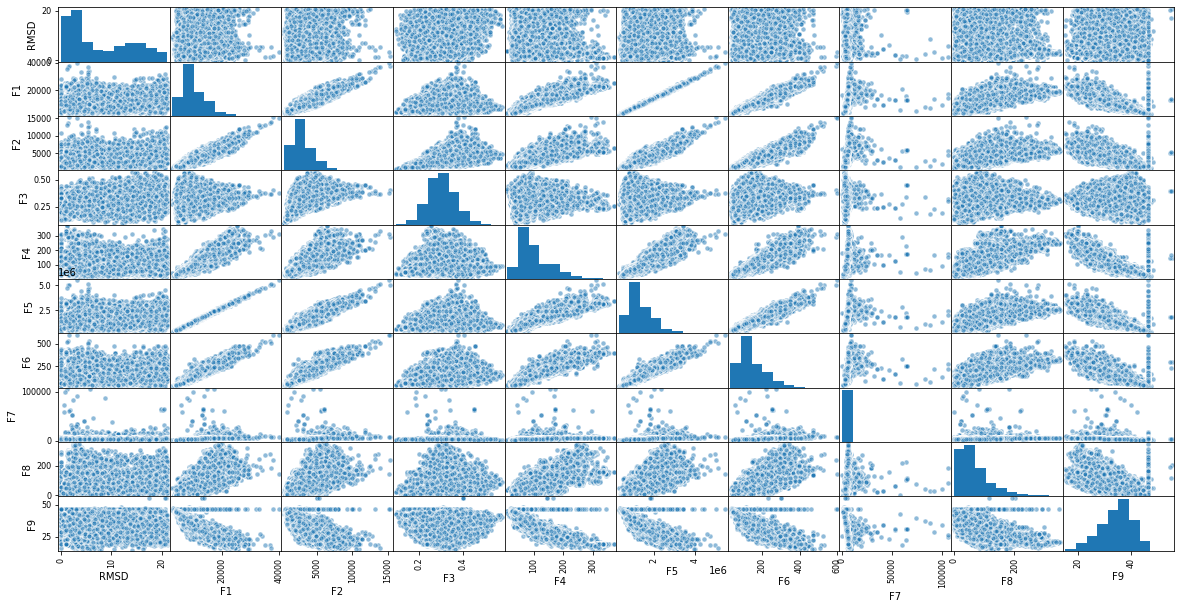

In [21]:
pd.plotting.scatter_matrix(data, figsize=(20,10), edgecolors='w',s=100)
plt.show()